In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

plt.style.use("seaborn")

# Data

In [2]:
with open('trainer_state_flan.json', 'r') as archivo_json:
    training_flan = json.load(archivo_json)
    
training_flan.keys()

dict_keys(['best_metric', 'best_model_checkpoint', 'epoch', 'eval_steps', 'global_step', 'is_hyper_param_search', 'is_local_process_zero', 'is_world_process_zero', 'log_history', 'logging_steps', 'max_steps', 'num_train_epochs', 'save_steps', 'total_flos', 'trial_name', 'trial_params'])

In [3]:
df_flan = pd.DataFrame(training_flan["log_history"])
df_flan.head()

,epoch,learning_rate,loss,step,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,0.5,0.0009,0.1304,682,NaN,NaN,NaN,NaN
1,0.5,NaN,NaN,682,0.055490,211.4634,44.258,5.533
2,1.0,0.0008,0.0628,1364,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,1364,0.041384,211.6059,44.228,5.529
4,1.5,0.0007,0.0544,2046,NaN,NaN,NaN,NaN


In [4]:
with open('trainer_state_falcon.json', 'r') as archivo_json:
    training_falcon = json.load(archivo_json)
    
training_falcon.keys()

dict_keys(['best_metric', 'best_model_checkpoint', 'epoch', 'eval_steps', 'global_step', 'is_hyper_param_search', 'is_local_process_zero', 'is_world_process_zero', 'log_history', 'logging_steps', 'max_steps', 'num_train_epochs', 'save_steps', 'total_flos', 'trial_name', 'trial_params'])

In [5]:
df_falcon = pd.DataFrame(training_falcon["log_history"])
df_falcon.head()

,epoch,learning_rate,loss,step,eval_loss,eval_runtime,eval_samples_per_second,eval_steps_per_second
0,0.5,0.000199,1.2437,682,NaN,NaN,NaN,NaN
1,0.5,NaN,NaN,682,1.018004,1449.2951,6.458,0.807
2,1.0,0.000188,0.9778,1364,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,1364,0.958427,1447.8552,6.464,0.808
4,1.5,0.000168,0.9177,2046,NaN,NaN,NaN,NaN


## Build DF

In [6]:
eval_df_flan = df_flan.dropna(subset=["eval_loss"])[[
    "epoch", "step", "eval_loss", "eval_runtime", "eval_samples_per_second",
    "eval_steps_per_second"
]]
train_df_flan = df_flan.dropna(subset=["loss"])[[
    "epoch", "learning_rate", "loss", "step"
]]
eval_df_flan.shape, train_df_flan.shape

((10, 6), (10, 4))

In [7]:
eval_df_falcon = df_falcon.dropna(subset=["eval_loss"])[[
    "epoch", "step", "eval_loss", "eval_runtime", "eval_samples_per_second",
    "eval_steps_per_second"
]]
train_df_falcon = df_falcon.dropna(subset=["loss"])[[
    "epoch", "learning_rate", "loss", "step"
]]
eval_df_falcon.shape, train_df_falcon.shape

((10, 6), (10, 4))

# Plots

## Learning rate

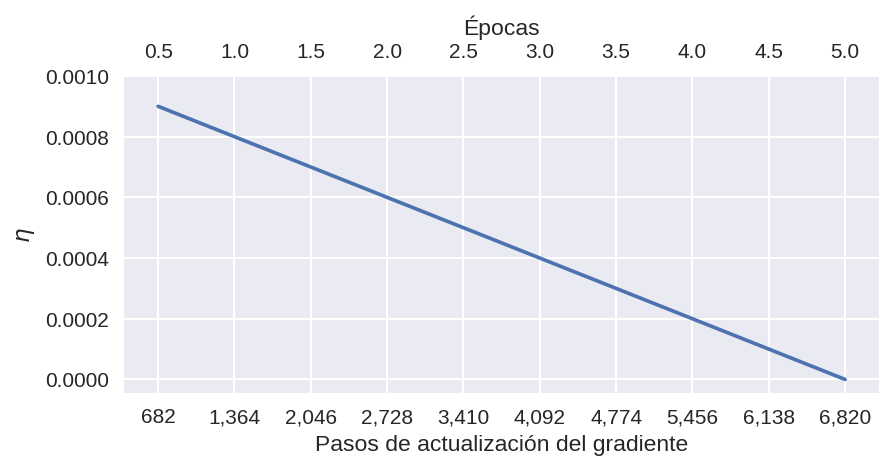

In [8]:
fig = plt.figure(dpi=150, figsize=(6.5, 2.8))

ax1 = fig.add_subplot(111)
ax1.plot(train_df_flan["step"], train_df_flan["learning_rate"])
ax1.set_xlabel("Pasos de actualización del gradiente")
ax1.set_xticks(range(682, 7500, 682))
ax1.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.set_yticks(np.arange(0.0, 0.0011, 0.0002))
plt.ylabel(r"$\eta$")

# 4. Configure second x-axis
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(range(682, 7500, 682), np.arange(0.5, 5.5, 0.5))
ax2.set_xlabel("Épocas")
ax2.grid(False)

#plt.title("Decaimiento de la tasa de aprendizaje");

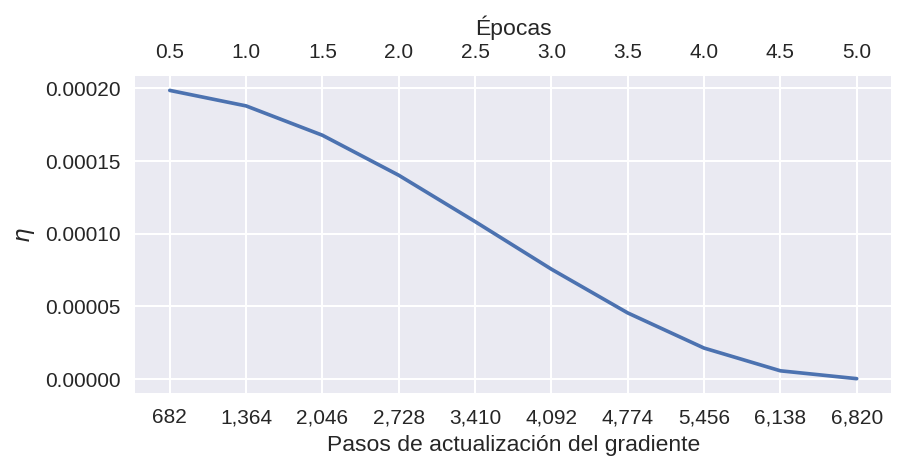

In [9]:
fig = plt.figure(dpi=150, figsize=(6.5, 2.8))

ax1 = fig.add_subplot(111)
ax1.plot(train_df_falcon["step"], train_df_falcon["learning_rate"])
ax1.set_xlabel("Pasos de actualización del gradiente")
ax1.set_xticks(range(682, 7500, 682))
ax1.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel(r"$\eta$")

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(range(682, 7500, 682), np.arange(0.5, 5.5, 0.5))
ax2.set_xlabel("Épocas")
ax2.grid(False)

## Loss

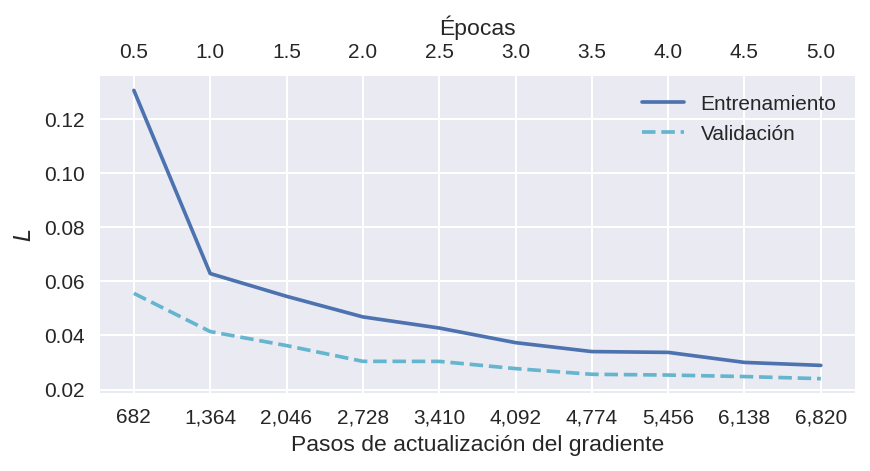

In [10]:
fig = plt.figure(dpi=150, figsize=(6.5, 2.8))

ax1 = fig.add_subplot(111)
ax1.plot(train_df_flan["step"], train_df_flan["loss"], label="Entrenamiento", color="#4C72B0")
ax1.set_xlabel("Pasos de actualización del gradiente")
ax1.set_xticks(range(682, 7500, 682))
plt.plot(eval_df_flan["step"], eval_df_flan["eval_loss"], label="Validación", ls="--", color="#64B5CD")
ax1.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel(r"$L$")
plt.legend();

# 4. Configure second x-axis
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(range(682, 7500, 682), np.arange(0.5, 5.5, 0.5))
ax2.set_xlabel("Épocas")
ax2.grid(False)

#plt.title("Pérdida durante entrenamiento y validación");

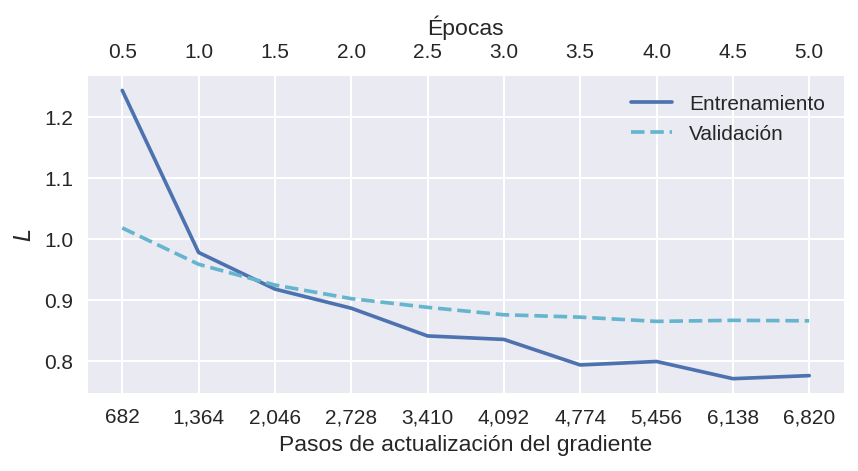

In [11]:
fig = plt.figure(dpi=150, figsize=(6.5, 2.8))

ax1 = fig.add_subplot(111)
ax1.plot(train_df_falcon["step"], train_df_falcon["loss"], label="Entrenamiento", color="#4C72B0")
ax1.set_xlabel("Pasos de actualización del gradiente")
ax1.set_xticks(range(682, 7500, 682))
plt.plot(eval_df_falcon["step"], eval_df_falcon["eval_loss"], label="Validación", ls="--", color="#64B5CD")
ax1.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel(r"$L$")
plt.legend();

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(range(682, 7500, 682), np.arange(0.5, 5.5, 0.5))
ax2.set_xlabel("Épocas")
ax2.grid(False)

In [46]:
df_metrics = pd.DataFrame([
    {"scneario": "with_bias", "Correcto": 26, "Incorrecto": 32},
    {"scneario": "without_bias", "Correcto": 257, "Incorrecto": 14},
    {"scneario": "unable_bias", "Correcto": 440, "Incorrecto": 13}
])

df_metrics["total"] = df_metrics["Correcto"] + df_metrics["Incorrecto"]
df_metrics["Correcto"] = df_metrics["Correcto"] / df_metrics["total"] * 100
df_metrics["Incorrecto"] = df_metrics["Incorrecto"] / df_metrics["total"] * 100
print(df_metrics["total"].sum())
df_metrics

782


,scneario,Correcto,Incorrecto,total
0,with_bias,44.827586,55.172414,58
1,without_bias,94.833948,5.166052,271
2,unable_bias,97.130243,2.869757,453


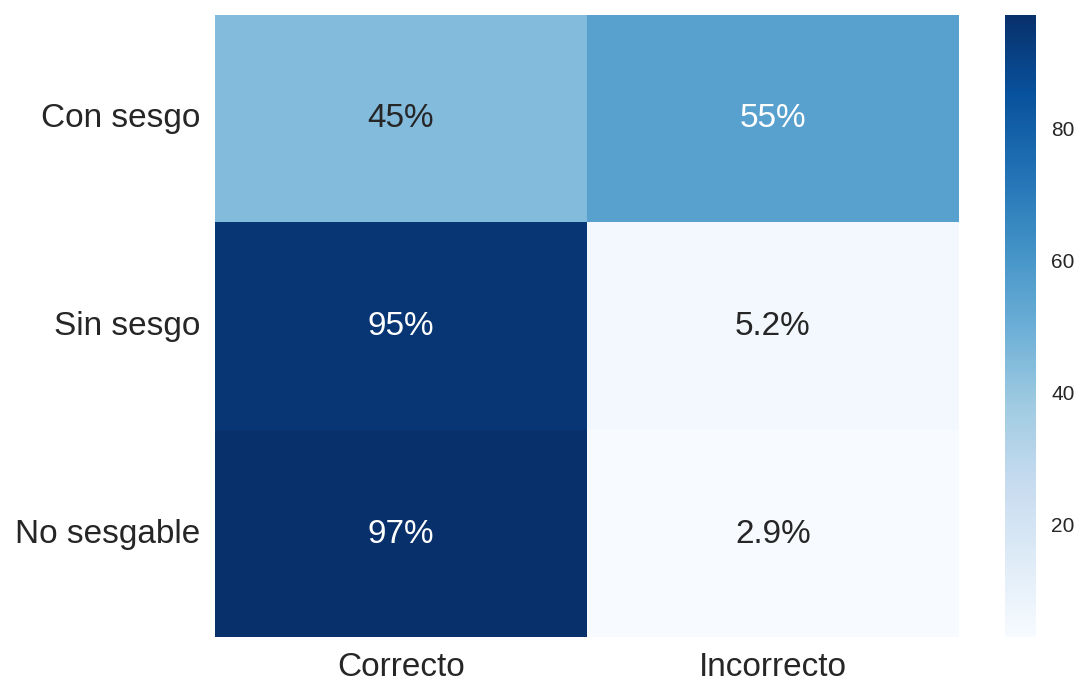

In [48]:
plt.figure(dpi=150)
ax = sns.heatmap(df_metrics[df_metrics.columns[1:3]], annot=True, cmap="Blues", annot_kws={"size": 16})
ax.set_yticklabels(["Con sesgo", "Sin sesgo", "No sesgable"], rotation=0)
for text in ax.texts:
    text.set_text(f"{text.get_text()}%")
ax.set_yticklabels(ax.get_yticklabels(), size=16)
ax.set_xticklabels(ax.get_xticklabels(), size=16);